##### Required import statements and package install commands

In [96]:
# pip install qiskit
# pip install qiskit_aer
# pip install qiskit-ibm-runtime

# Base
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import math

# Quantum
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer.primitives import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram

##### Quantum circuit using Aer quantum simulator with 5 qubits and using Hadamard gates, running on CPU

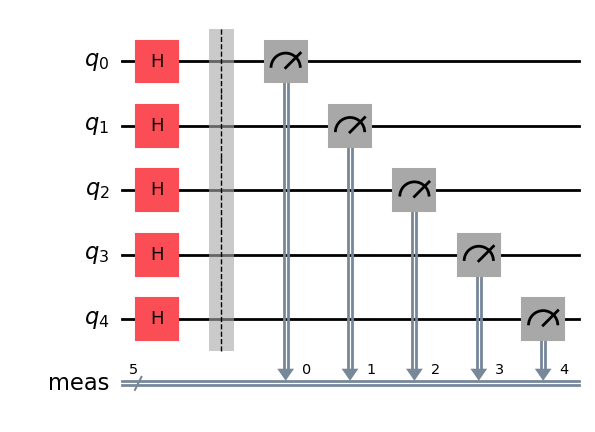

In [84]:
# create a smaller quantum circuit with 5 quantum bits (qubits)
qc = QuantumCircuit(5)

# apply Hadamard's gate to every qubit
qubits = [0, 1, 2, 3, 4]
qc.h(qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on CPU)
aer_sim = AerSimulator()

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

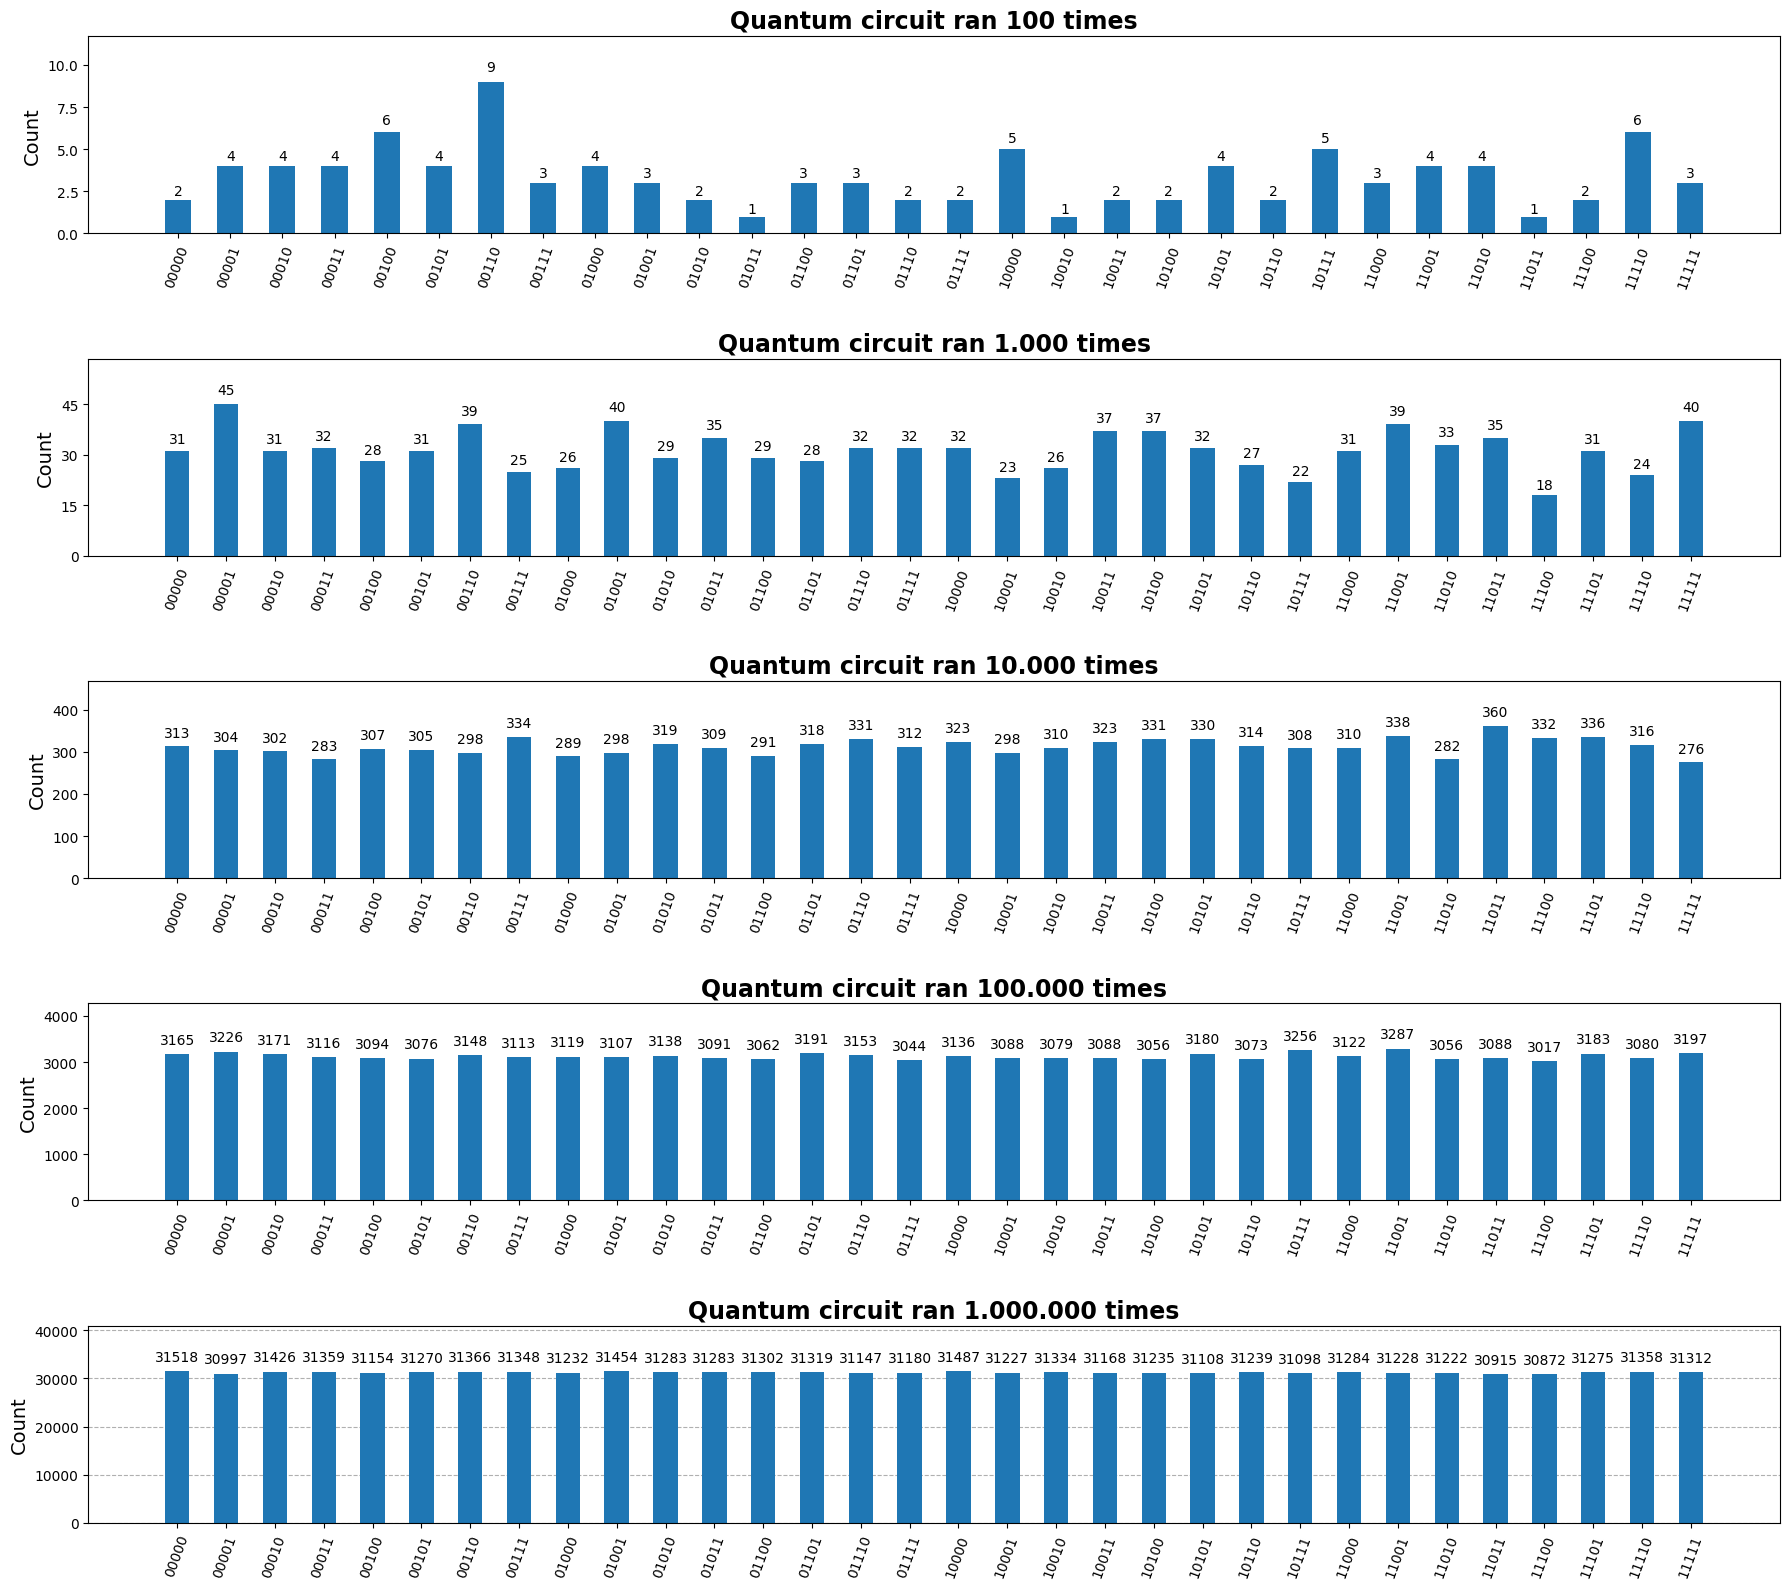

In [85]:
# run quantum circuit different amount of times, get results & compare them
sampler = Sampler()

shot_counts = [100, 1000, 10000, 100000, 1000000]
histograms = []

# run the circuit for each shot count and collect the results
for shots in shot_counts:
    result = sampler.run([qc], shots=shots).result()
    counts = result[0].data.meas.get_counts()
    histograms.append(counts)

# 1000 --> 1.000
# 1000000 --> 1.000.000
def formatLargeNumber(number):
    return format(number, ',').replace(',', '.')

# plot histograms in a vertical stack inside figure
fig, axes = plt.subplots(len(shot_counts), 1, figsize=(18, 16))
for i, counts in enumerate(histograms):
    plot_histogram(counts, ax=axes[i])
    axes[i].set_title(f'Quantum circuit ran {formatLargeNumber(shot_counts[i])} times', fontsize=17, fontweight='bold')
    axes[i].set_ylim(0, max(counts.values()) * 1.3)

plt.tight_layout(h_pad=3.0)
plt.show()

##### Quantum circuit using Aer quantum simulator with 29 qubits and using Hadamard gates, running on GPU

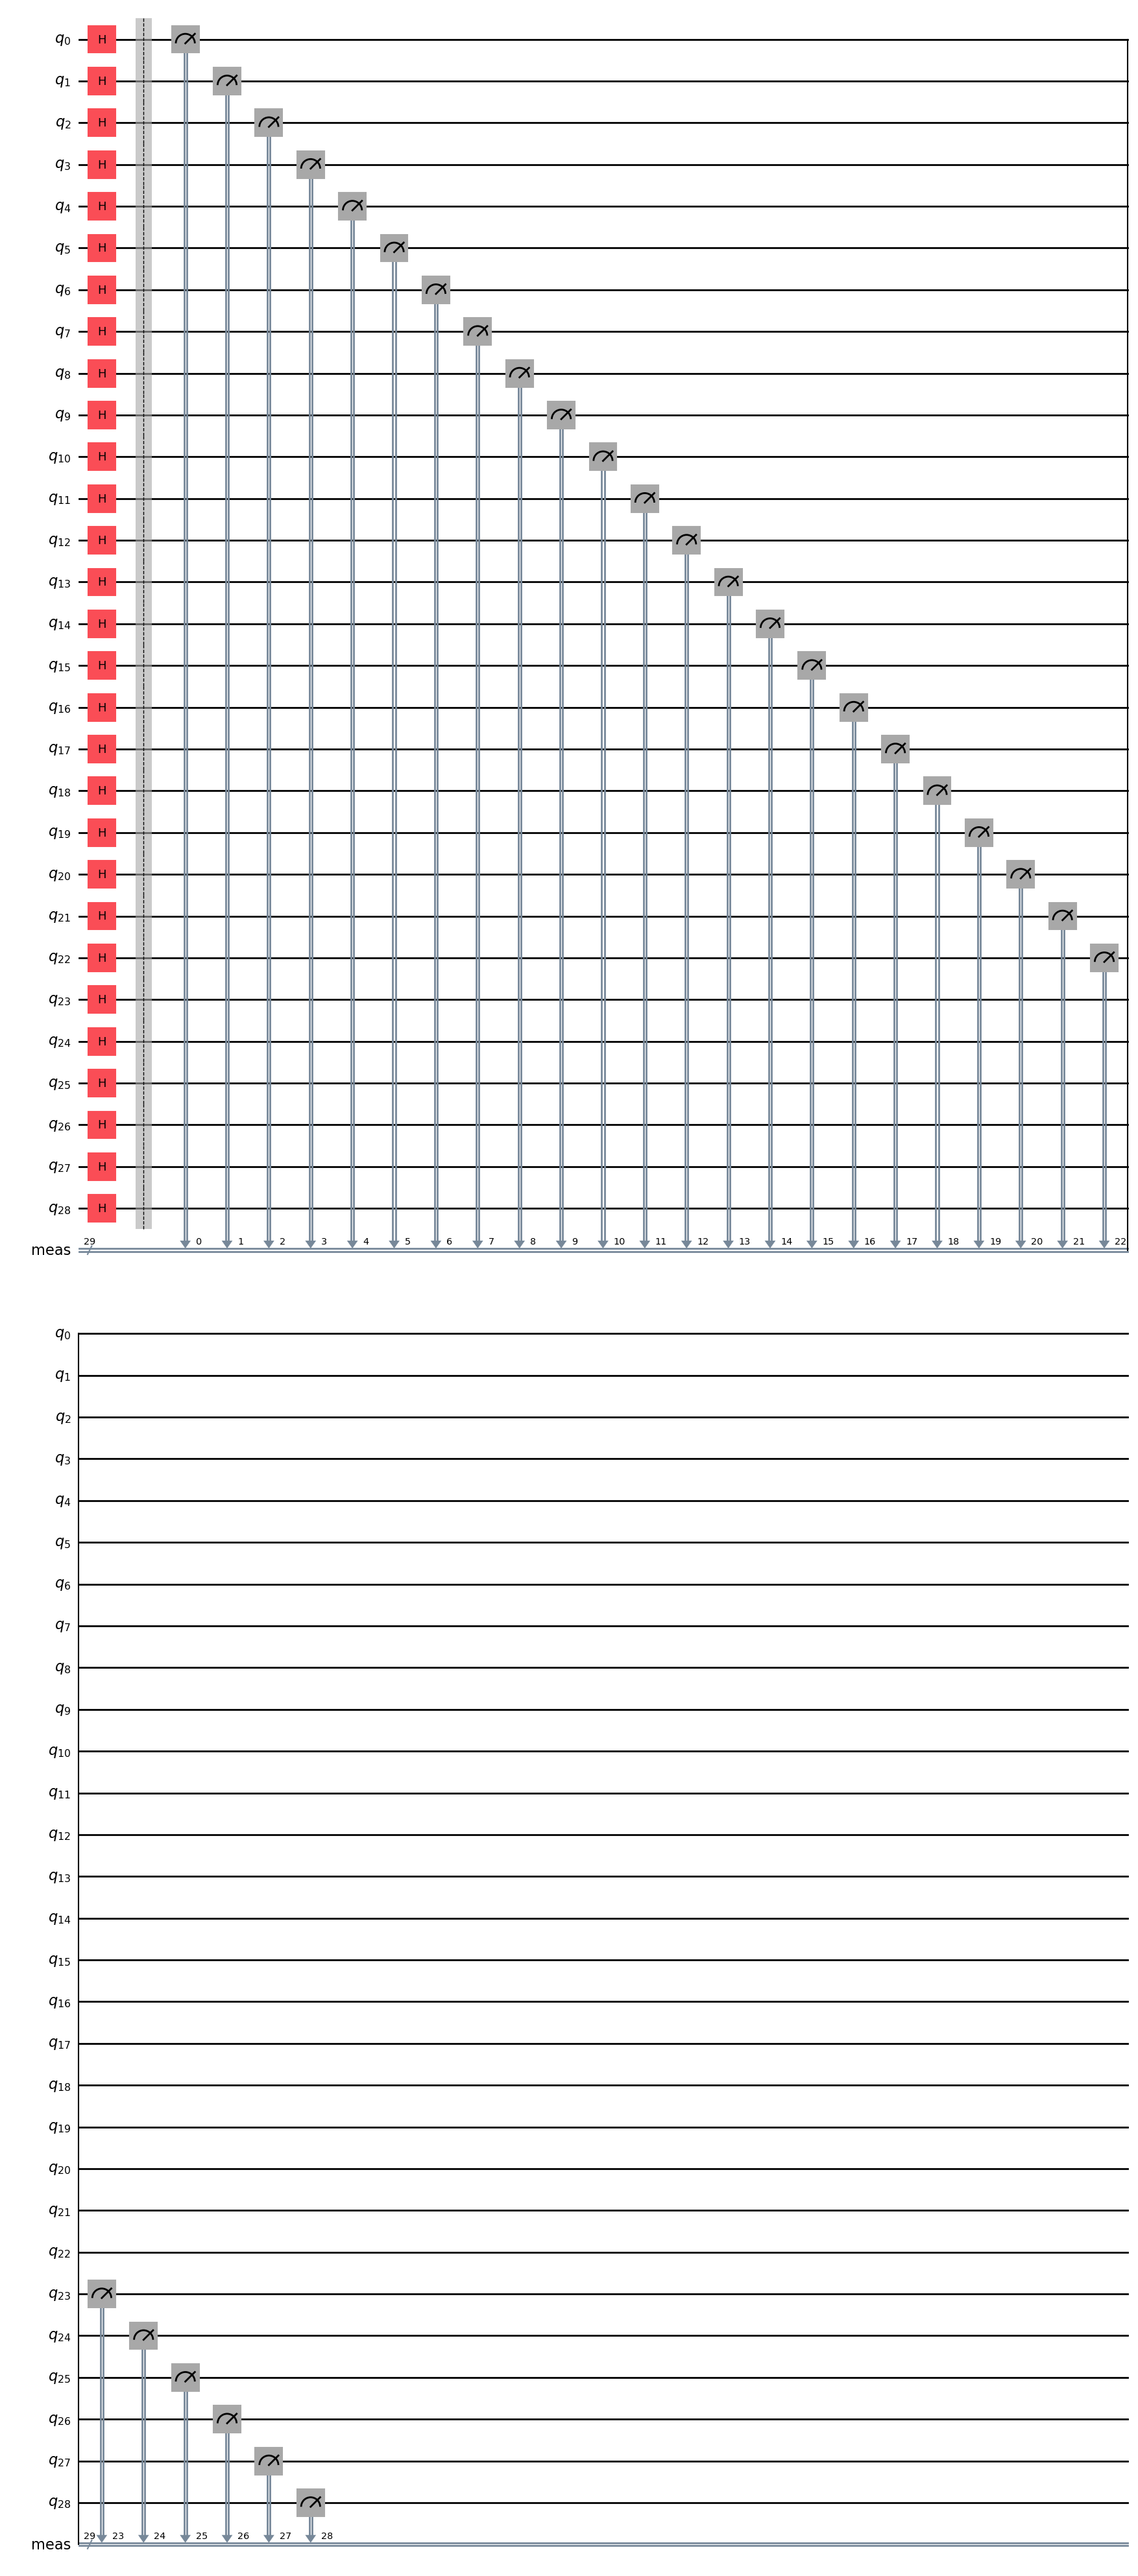

In [87]:
# create quantum circuit with 29 quantum bits (qubits)
qc = QuantumCircuit(29)

# apply Hadamard's gate to every qubit
qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]
qc.h(qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

23148020: 1
290466636: 1
251450550: 1
180680355: 1
195711056: 1
7098245: 1
5563354: 1
226793403: 1
166026931: 1
254181822: 1
397303604: 1
7955078: 1
53877779: 1
325581758: 1
412823200: 1
321282184: 1
354907099: 1
104216815: 1
235730714: 1
418440626: 1
34562914: 1
522120468: 1
231674503: 1
303972703: 1
296750947: 1
314377643: 1
116042130: 1
362580209: 1
513952981: 1
325322249: 1
74118939: 1
1723120: 1
147613512: 1
514204492: 1
444829119: 1
332740992: 1
102635207: 1
499740892: 1
383316688: 1
203336525: 1
206086735: 1
240600299: 1
109174210: 1
304698474: 1
379171800: 1
183588308: 1
429527786: 1
369929187: 1
80874912: 1
121596136: 1
299906888: 1
179304599: 1
365383883: 1
257895859: 1
191573325: 1
239475187: 1
325791528: 1
155750286: 1
10565894: 1
395294792: 1
168259696: 1
336653286: 1
261134917: 1
273956073: 1
335482841: 1
269394582: 1
160801722: 1
47705881: 1
519545087: 1
381848773: 1
29756707: 1
302671599: 1
241973797: 1
517261436: 1
120285338: 1
49090799: 1
48301730: 1
147706306: 1
3632

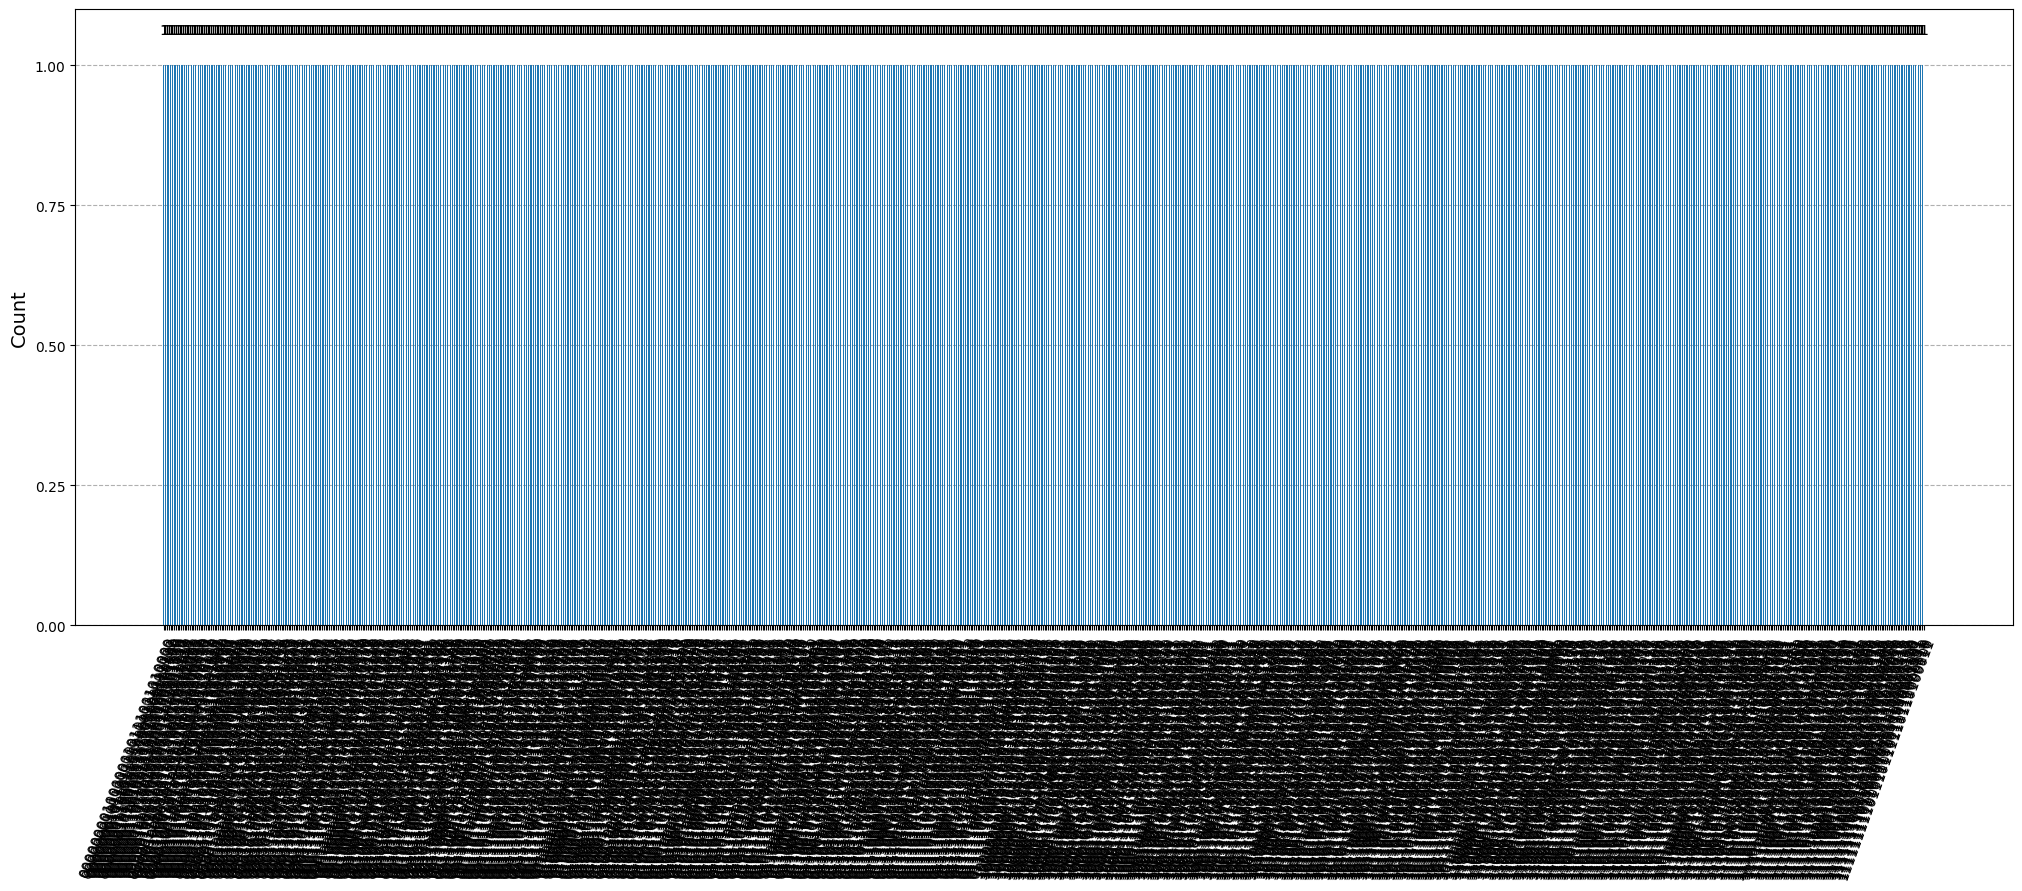

In [88]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

# print qubits and their values
for qubits, val in counts.items():
    print(f'{int(qubits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts, figsize=(25,8))

##### Quantum circuit using Aer quantum simulator with 29 qubits and using Rotation gates, running on GPU

Calculations of angles for the following probabilities: 0.25, 0.5 and 0.75

<br/>

$p = 0.25$

$\sqrt{p} = \sqrt{0.25} = 0.5$

$theta = 2 * arcsin(0.5) = pi/3 = 60°$

<br/>

$p = 0.5$

$\sqrt{p} = \sqrt{0.5} = 0.707$

$theta = 2 * arcsin(0.707) = pi/2 = 90°$

<br/>

$p = 0.75$

$\sqrt{p} = \sqrt{0.75} = 0.866$

$theta = 2 * arcsin(0.866) = 2pi/3 = 120°$

angles in radians: [1.05, 1.57, 2.09]
angles in degrees: [60, 90, 120]


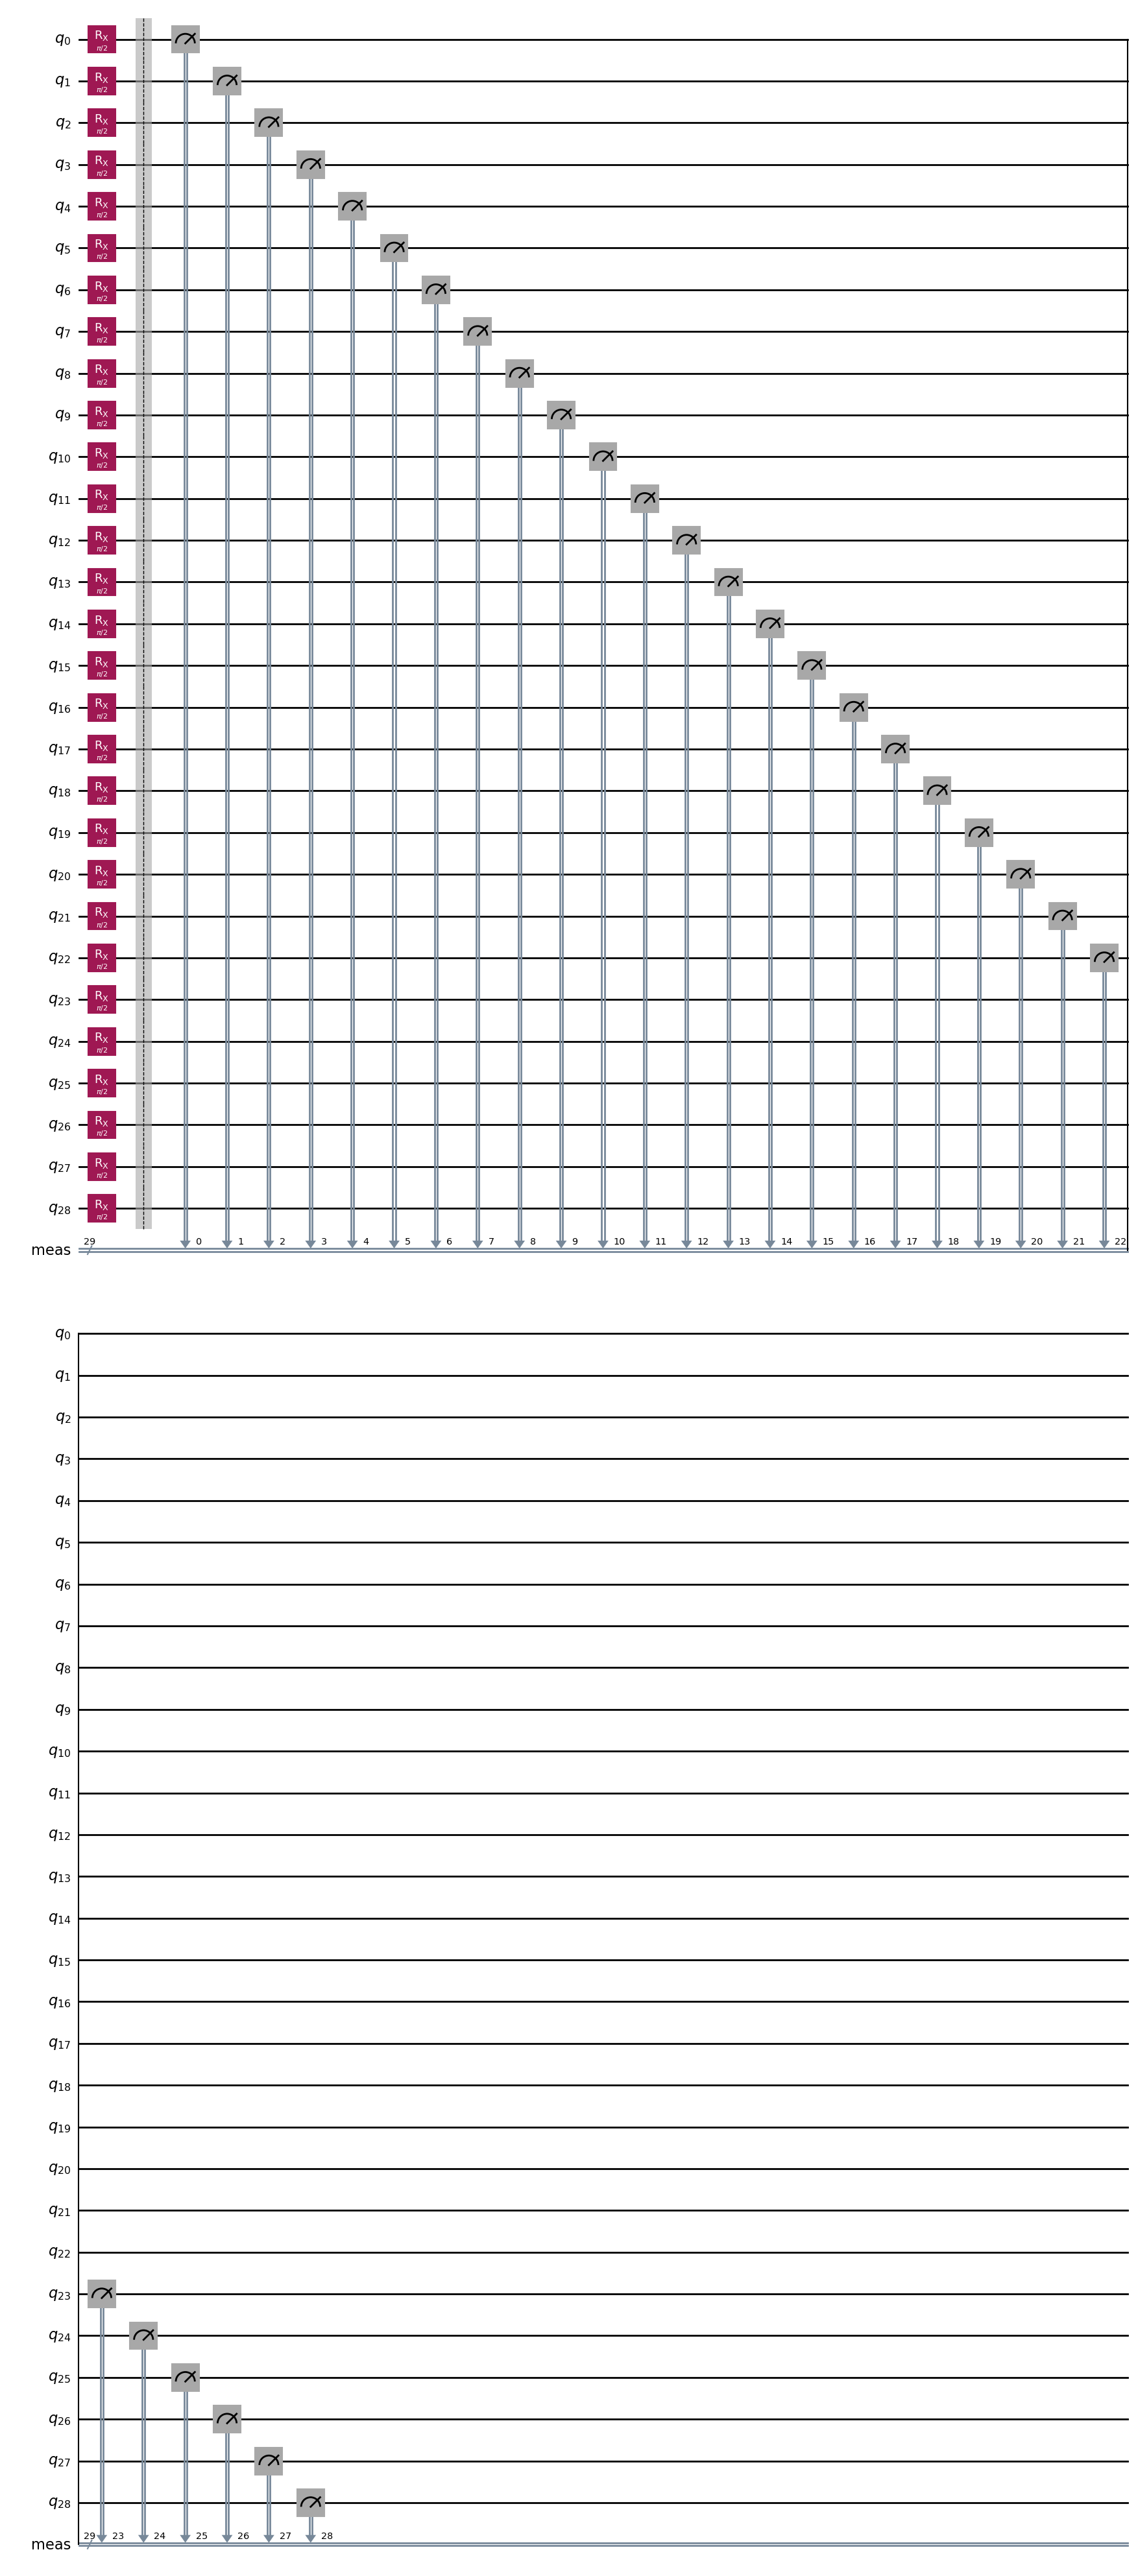

In [110]:
# create quantum circuit with 29 qubits
qc = QuantumCircuit(29)

qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]

# define probabilities
probabilities = [0.25, 0.5, 0.75]

# calculate rotation angles in radians and convert to degrees
angles_rad = [round(2 * math.asin(math.sqrt(p)), 2) for p in probabilities]
angles_deg = [round(math.degrees(angle)) for angle in angles_rad]

print(f'angles in radians: {angles_rad}')
print(f'angles in degrees: {angles_deg}')

# pi/3 (60°) = 25 %
# pi/2 (90°) = 50 %
# 2*pi/3 (120°) = 75 %

# rotation gates set to pi/2 (50%) probability for each qubit
qc.rx(math.pi/2, qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

215091707: 1
13523204: 1
307293192: 1
147487978: 1
316431848: 1
90695948: 1
400392148: 1
73643310: 1
217834257: 1
329871086: 1
192321813: 1
251904698: 1
490316122: 1
328458696: 1
389977047: 1
430421560: 1
254621057: 1
151157280: 1
270665728: 1
242557501: 1
194745805: 1
227712904: 1
367193863: 1
48387482: 1
312990927: 1
501692606: 1
220537357: 1
192080890: 1
144718595: 1
416073073: 1
515201528: 1
210501491: 1
234596200: 1
487185019: 1
172024489: 1
291091856: 1
87604182: 1
272692688: 1
202620590: 1
380424032: 1
252562212: 1
281731302: 1
182793753: 1
310129343: 1
77760698: 1
398890110: 1
513056408: 1
220898797: 1
125695012: 1
520936225: 1
305481342: 1
4700718: 1
124264763: 1
343480211: 1
243516233: 1
235185242: 1
228000405: 1
367388300: 1
60175245: 1
436850045: 1
20018381: 1
389028390: 1
279708355: 1
476271944: 1
450754550: 1
66253367: 1
77518074: 1
266861287: 1
266282221: 1
511139610: 1
327338249: 1
371711095: 1
86619377: 1
89739827: 1
143526854: 1
313358320: 1
278356447: 1
72267713: 1
1

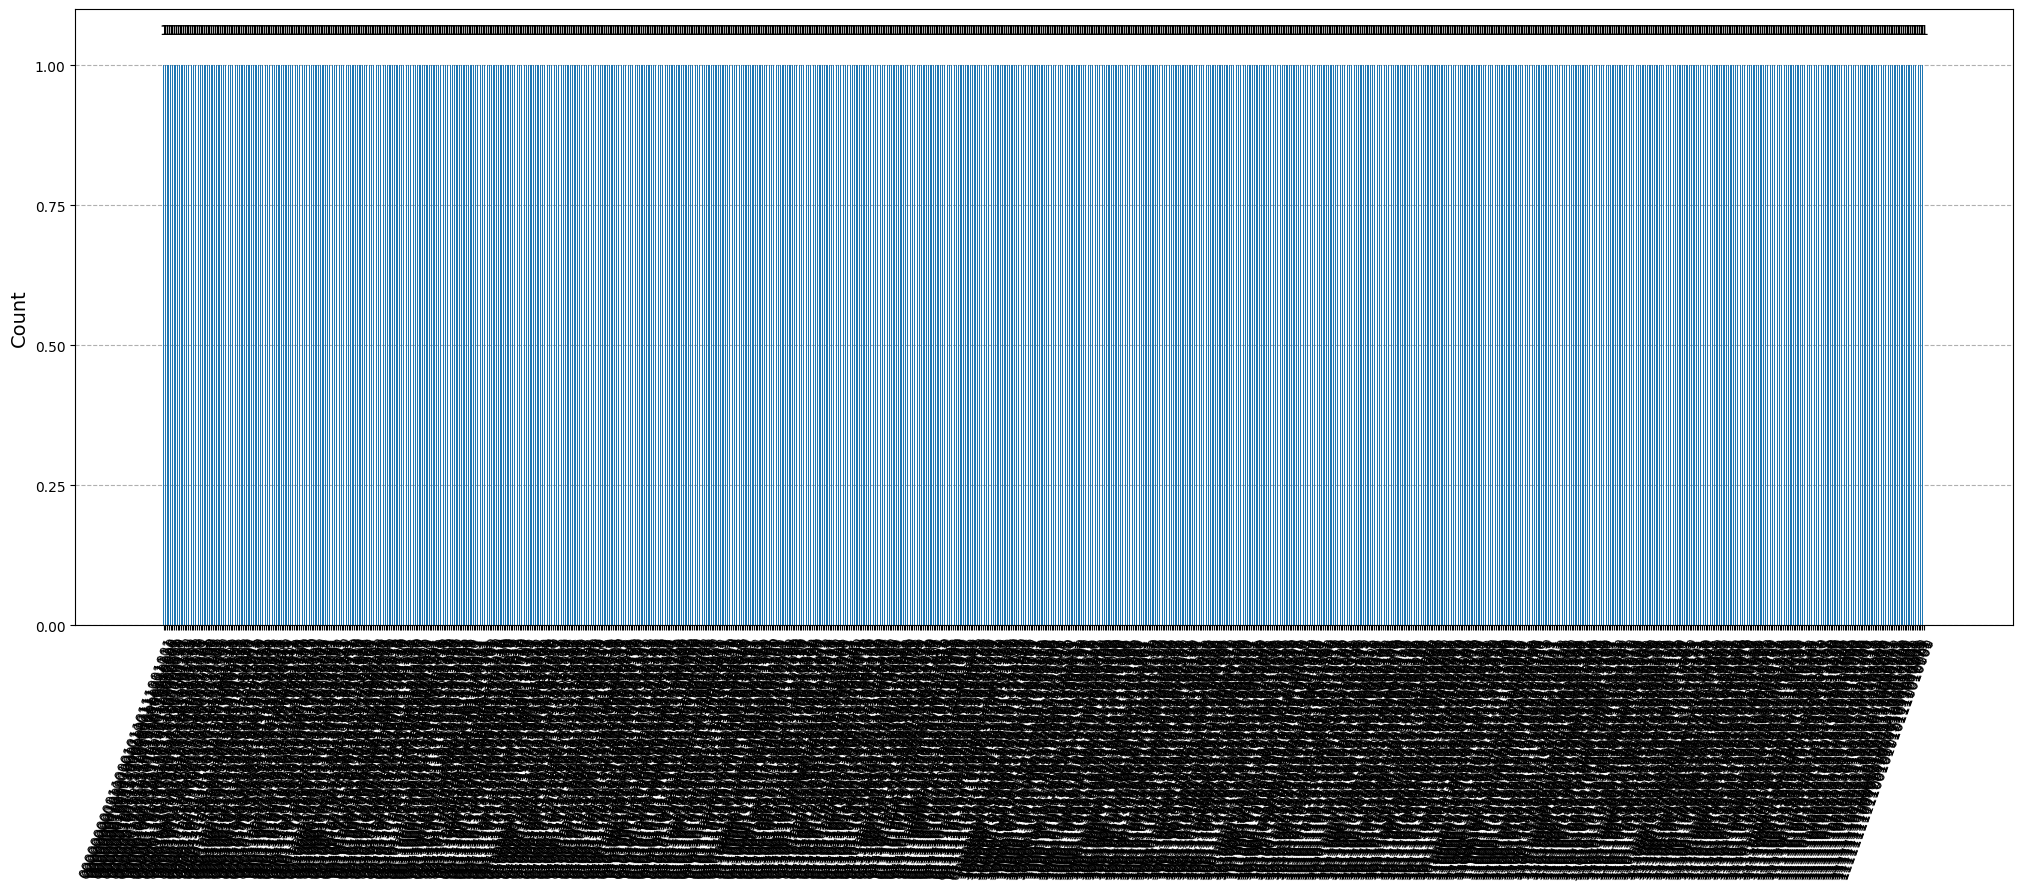

In [111]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

# print qubits and their values
for qubits, val in counts.items():
    print(f'{int(qubits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts, figsize=(25,8))

#### Calculation of angle (in radians) for generating number 3 with a 50 % probability

3<sub>(10)</sub> = 11<sub>(2)</sub>

$P(11) = p * p = p^2$

$p^2 = 0.5$

$p = \sqrt{0.5} = 1/\sqrt{2} = 0.707$

$p = sin^2(\theta/2)$

$sin^2(\theta/2) = 1/\sqrt(2)$

$sin(\theta/2) = \sqrt{1/\sqrt{2}} = 0.841$

$\theta/2 = arcsin(0.841) = 57° = 1.0$ radian

$\theta = 2 * 57 = 114.5° = 2.0$ radian

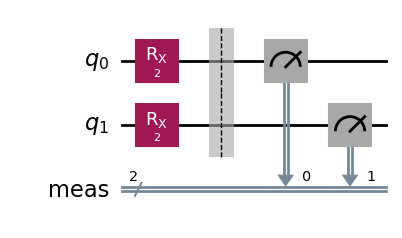

In [182]:
# create quantum circuit with 2 qubits (number 3 in decimal only requires 2 binary digits)
qc = QuantumCircuit(2)

qubits = [0, 1]
theta = 2

# rotation gates set to 2 radians probability for each of the 2 qubits
qc.rx(theta, qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

0: 11
3: 46
1: 22
2: 21


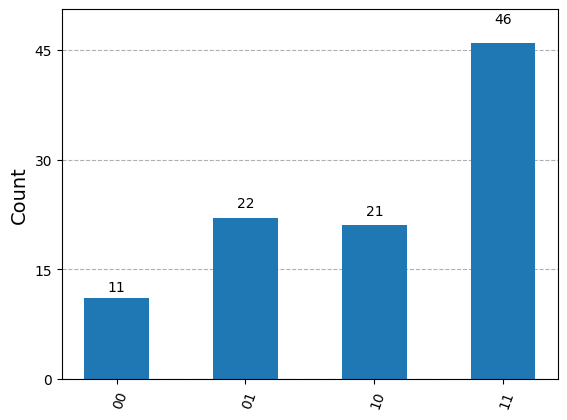

In [183]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=100).result()

counts = result[0].data.meas.get_counts()

for bits, val in counts.items():
    print(f'{int(bits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts)

#### Calculation of angle (in radians) for generating 576<sub>(10)</sub> = 1001000000<sub>(2)</sub> with a 25 % probability

Since only 2 bits in the binary representation of the decimal number 576 are set to 1, we can do the following:

$P = 0.25$

$P = p^2$ (power of 2 because only 2 bits are set to 1)

$p^2 = 0.25$

$p = \sqrt{0.25} = 0.5$

$p = sin^2(\theta/2)$

$sin^2(\theta/2) = 0.5$

$sin(\theta/2) = \sqrt{0.5} = 0.707$

$\theta/2 = arcsin(0.707) = 45° = 0.785$ radian

$\theta = 2 * 45 = 90° = 1.57$ radian

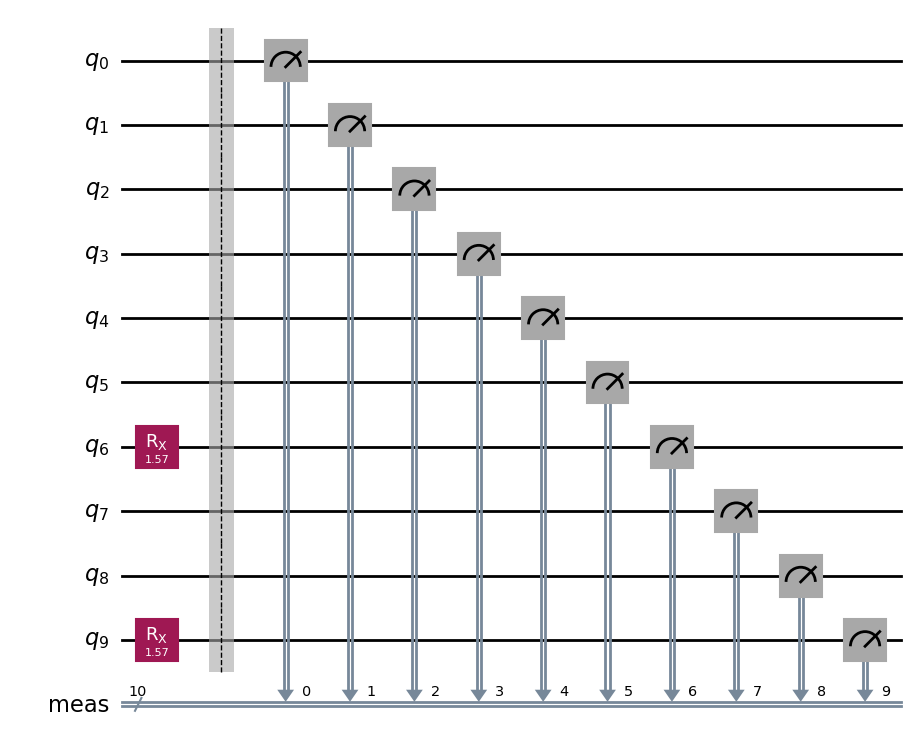

In [155]:
# create quantum circuit with 10 qubits (number 576 in decimal requires 10 binary digits)
qc = QuantumCircuit(10)

# 576 --> 1001000000
# only 6th and 9th bit are set to 1 (if counting from the back to the front)
qubits = [6, 9] 
# calculated theta in radians
theta = 1.57

# rotation gates set to 2 radians probability for each of the 2 qubits
qc.rx(theta, qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

512: 245
0: 228
576: 289
64: 238


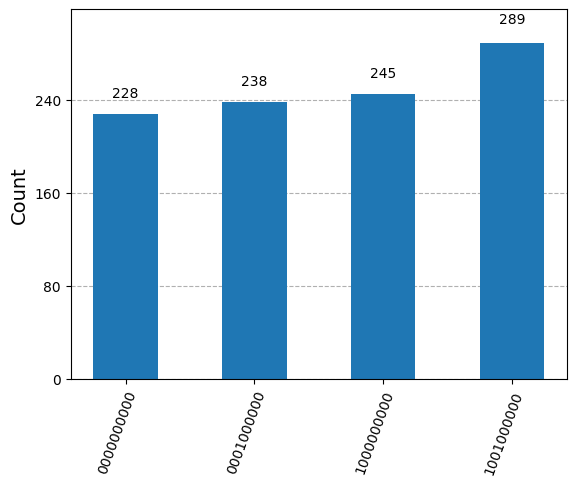

In [166]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

for bits, val in counts.items():
    print(f'{int(bits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts)

#### Calculation of angle (in radians) for generating 576<sub>(10)</sub> = 1001000000<sub>(2)</sub> with a 50 % probability

Since only 2 bits in the binary representation of the decimal number 576 are set to 1, we can do the following:

$P = 0.5$

$P = p^2$ (power of 2 because only 2 bits are set to 1)

$p^2 = 0.5$

$p = \sqrt{0.5} = 0.707$

$p = sin^2(\theta/2)$

$sin^2(\theta/2) = 0.707$

$sin(\theta/2) = \sqrt{0.707} = 0.841$

$\theta/2 = arcsin(0.841) = 57° = 1.0$ radian

$\theta = 2 * 57 = 114.5° = 2.0$ radian

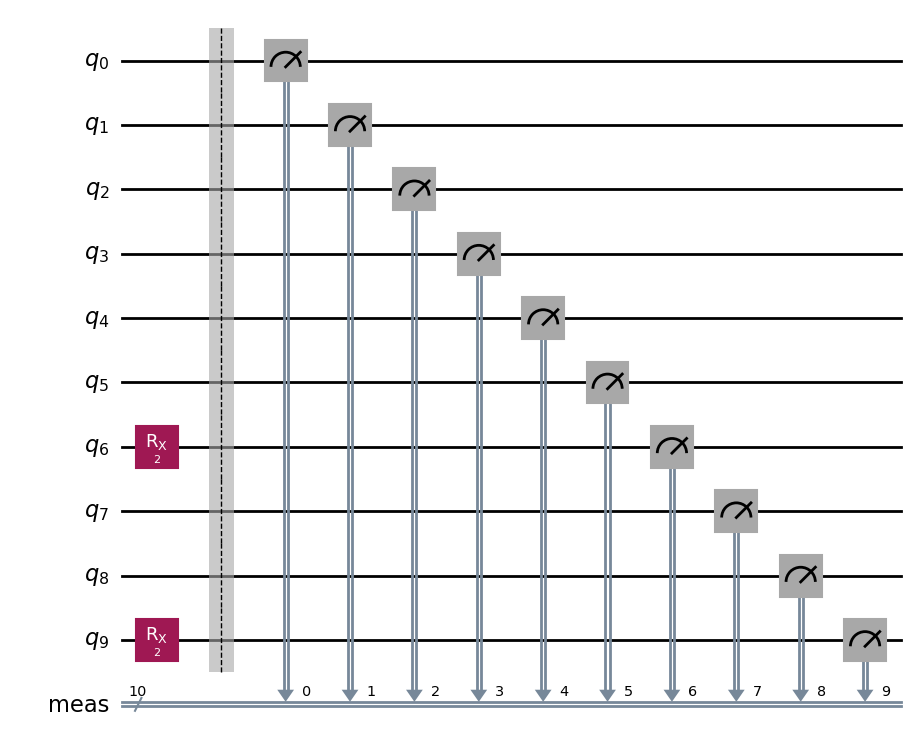

In [181]:
# create quantum circuit with 10 qubits (number 576 in decimal requires 10 binary digits)
qc = QuantumCircuit(10)

# 576 --> 1001000000
# only 6th and 9th bit are set to 1 (if counting from the back to the front)
qubits = [6, 9]
# calculated theta in radians
theta = 2

# rotation gates set to 2 radians probability for each of the 2 qubits
qc.rx(theta, qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

64: 206
576: 498
512: 199
0: 97


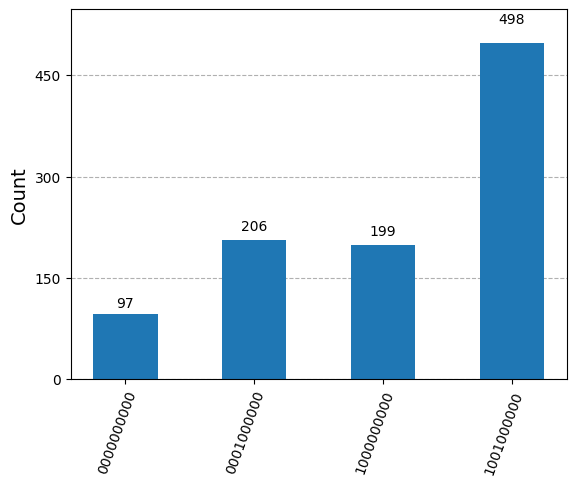

In [168]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

for bits, val in counts.items():
    print(f'{int(bits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts)

#### Calculation of angle (in radians) for generating 576<sub>(10)</sub> = 1001000000<sub>(2)</sub> with a 75 % probability

Since only 2 bits in the binary representation of the decimal number 576 are set to 1, we can do the following:

$P = 0.75$

$P = p^2$ (power of 2 because only 2 bits are set to 1)

$p^2 = 0.75$

$p = \sqrt{0.75} = 0.866$

$p = sin^2(\theta/2)$

$sin^2(\theta/2) = 0.866$

$sin(\theta/2) = \sqrt{0.866} = 0.931$

$\theta/2 = arcsin(0.931) = 68.6° = 1.2$ radian

$\theta = 2 * 68.6 = 137.2° = 2.4$ radian

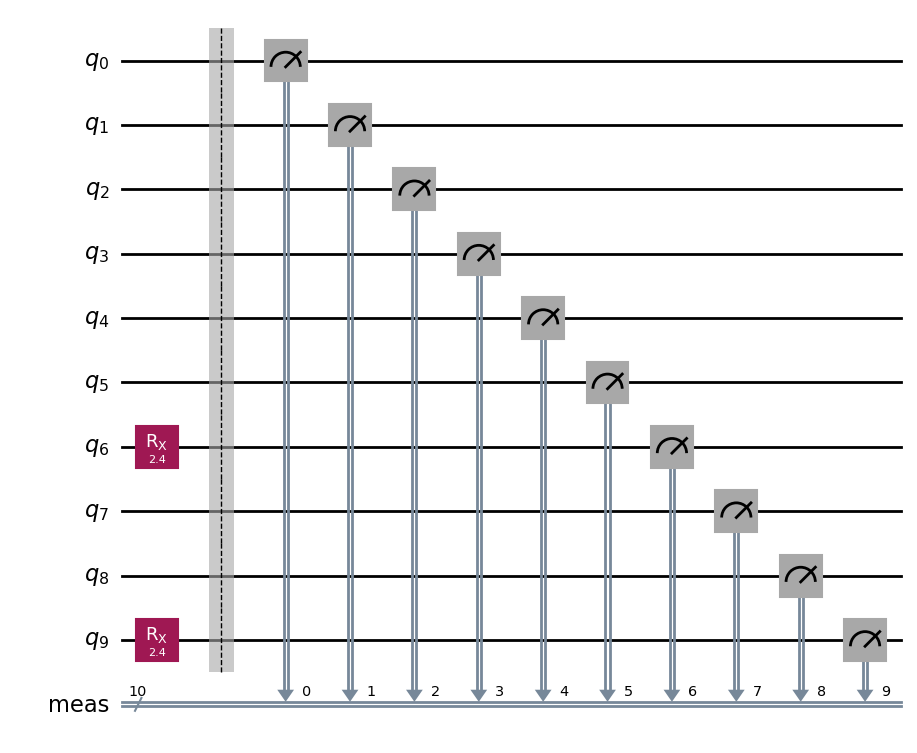

In [178]:
# create quantum circuit with 10 qubits (number 576 in decimal requires 10 binary digits)
qc = QuantumCircuit(10)

# 576 --> 1001000000
# only 6th and 9th bit are set to 1 (if counting from the back to the front)
qubits = [6, 9]
# calculated theta in radians
theta = 2.4

# rotation gates set to 2 radians probability for each of the 2 qubits
qc.rx(theta, qubits)

# measure all qubits
qc.measure_all()

# use local quantum simulator (running on GPU)
aer_sim = AerSimulator(device='GPU')

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=aer_sim, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

64: 108
576: 751
512: 119
0: 22


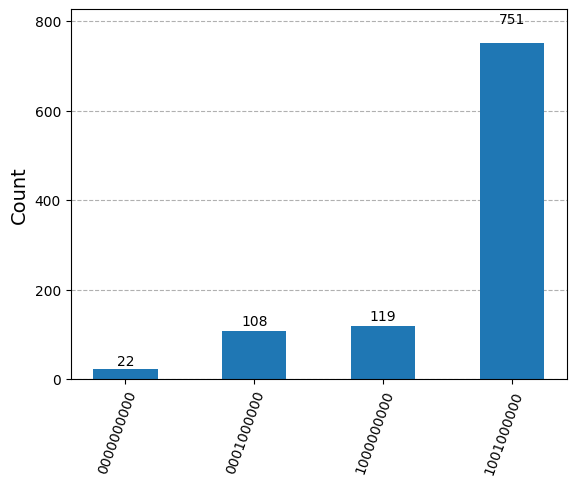

In [179]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

for bits, val in counts.items():
    print(f'{int(bits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts)

<hr/>

#### Kaj ste morali spremeniti v algoritmu, da ste dosegli poljubno verjetnost generiranja naključnih števil?

Z uporabo enačb sem moral za poljubno verjetnost izračunati kot theta (v radianih).
<hr/>

#### Ali bi lahko zgoraj navedene poljubne verjetnosti (0,25, 0,50 in 0,75), dosegli s pomočjo Hadamardovih vrat? Odgovor utemeljite.

Z uporabo Hadamardovih vrat smo pri generaciji s poljubnimi verjetnostmi omejeni, in sicer lahko s Hadamardovimi vrati generiramo samo s 50-odstotno verjetnostjo. Razlog za to je narava njihovega delovanja, saj Hadamardova vrata generirajo samo ekvivalentno superpozicijo qubitov $|0\rangle$ in $|1\rangle$.
<hr/>

#### S kakšno verjetnostjo se v vašem generatorju generirajo ostala števila (poleg tistega, ki ga določajo zadnje tri cifre vaše vpisne številke)?

Števila, ki imajo v binarni obliki na enakih mestih (kot število 576) bite nastavljene na 1, so generirana z večjo verjetnostjo, kot tista, ki se s številom 576 v bitih ne ujemajo.
<hr/>

##### Large quantum circuit using IBM's quantum simulator with 127 qubits

In [27]:
# create a larger quantum circuit with 127 quantum bits (qubits)
qc = QuantumCircuit(127)

# apply Hadamard's gate to every qubit
qubits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
          33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
          65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
          97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126]

qc.h(qubits)

# measure all qubits
qc.measure_all()

# use IBM's quantum computer simulator (register here to get API TOKEN: https://quantum.ibm.com/)
API_TOKEN = "1ac02f42d976d14a0cea984659aa1d1d13bbf4746537030ad3ee4912f7ac00f4d3fa678570de8ce909d2b30ed887892f03e92f05c306ac94229dce2dbfe2f830"
provider = QiskitRuntimeService(channel='ibm_quantum', token=API_TOKEN)
backend = provider.backend("ibm_kyoto")

# genertate ISA instruction set architecture
pm = generate_preset_pass_manager(backend=backend, optimization_level=0)
qc_isa = pm.run(qc)

# visualize quantum circuit
qc_isa.draw('mpl')

241100667: 1
203271275: 1
143524757: 1
311294982: 1
397062628: 1
107633279: 1
482472602: 1
530759543: 1
265098758: 1
314539897: 1
409705794: 1
123137409: 1
449308354: 1
120510936: 1
244411909: 1
435169315: 1
426991800: 1
276324843: 1
344800856: 1
17522445: 1
160647841: 1
351325243: 1
80001157: 1
323631565: 1
350995043: 1
95768813: 1
56204285: 1
372137644: 1
336698898: 1
117907379: 1
475072400: 1
378706832: 1
495470244: 1
291349885: 1
54310764: 1
316282903: 1
433805220: 1
261348271: 1
309216788: 1
244596251: 1
225445899: 1
315477089: 1
249074601: 1
353782028: 1
425137311: 1
90076961: 1
476359652: 1
166146452: 1
446508903: 1
361712484: 1
192258929: 1
77297306: 1
107096310: 1
2186129: 1
17500259: 1
48928837: 1
188166558: 1
408707022: 1
316003479: 1
424292433: 1
63710451: 1
115851983: 1
425597131: 1
156854114: 1
347732795: 1
353652788: 1
168672848: 1
98166998: 1
496148859: 1
292997793: 1
132440100: 1
340069127: 1
16078231: 1
74052818: 1
64562205: 1
15393973: 1
257125833: 1
468432370: 1
241

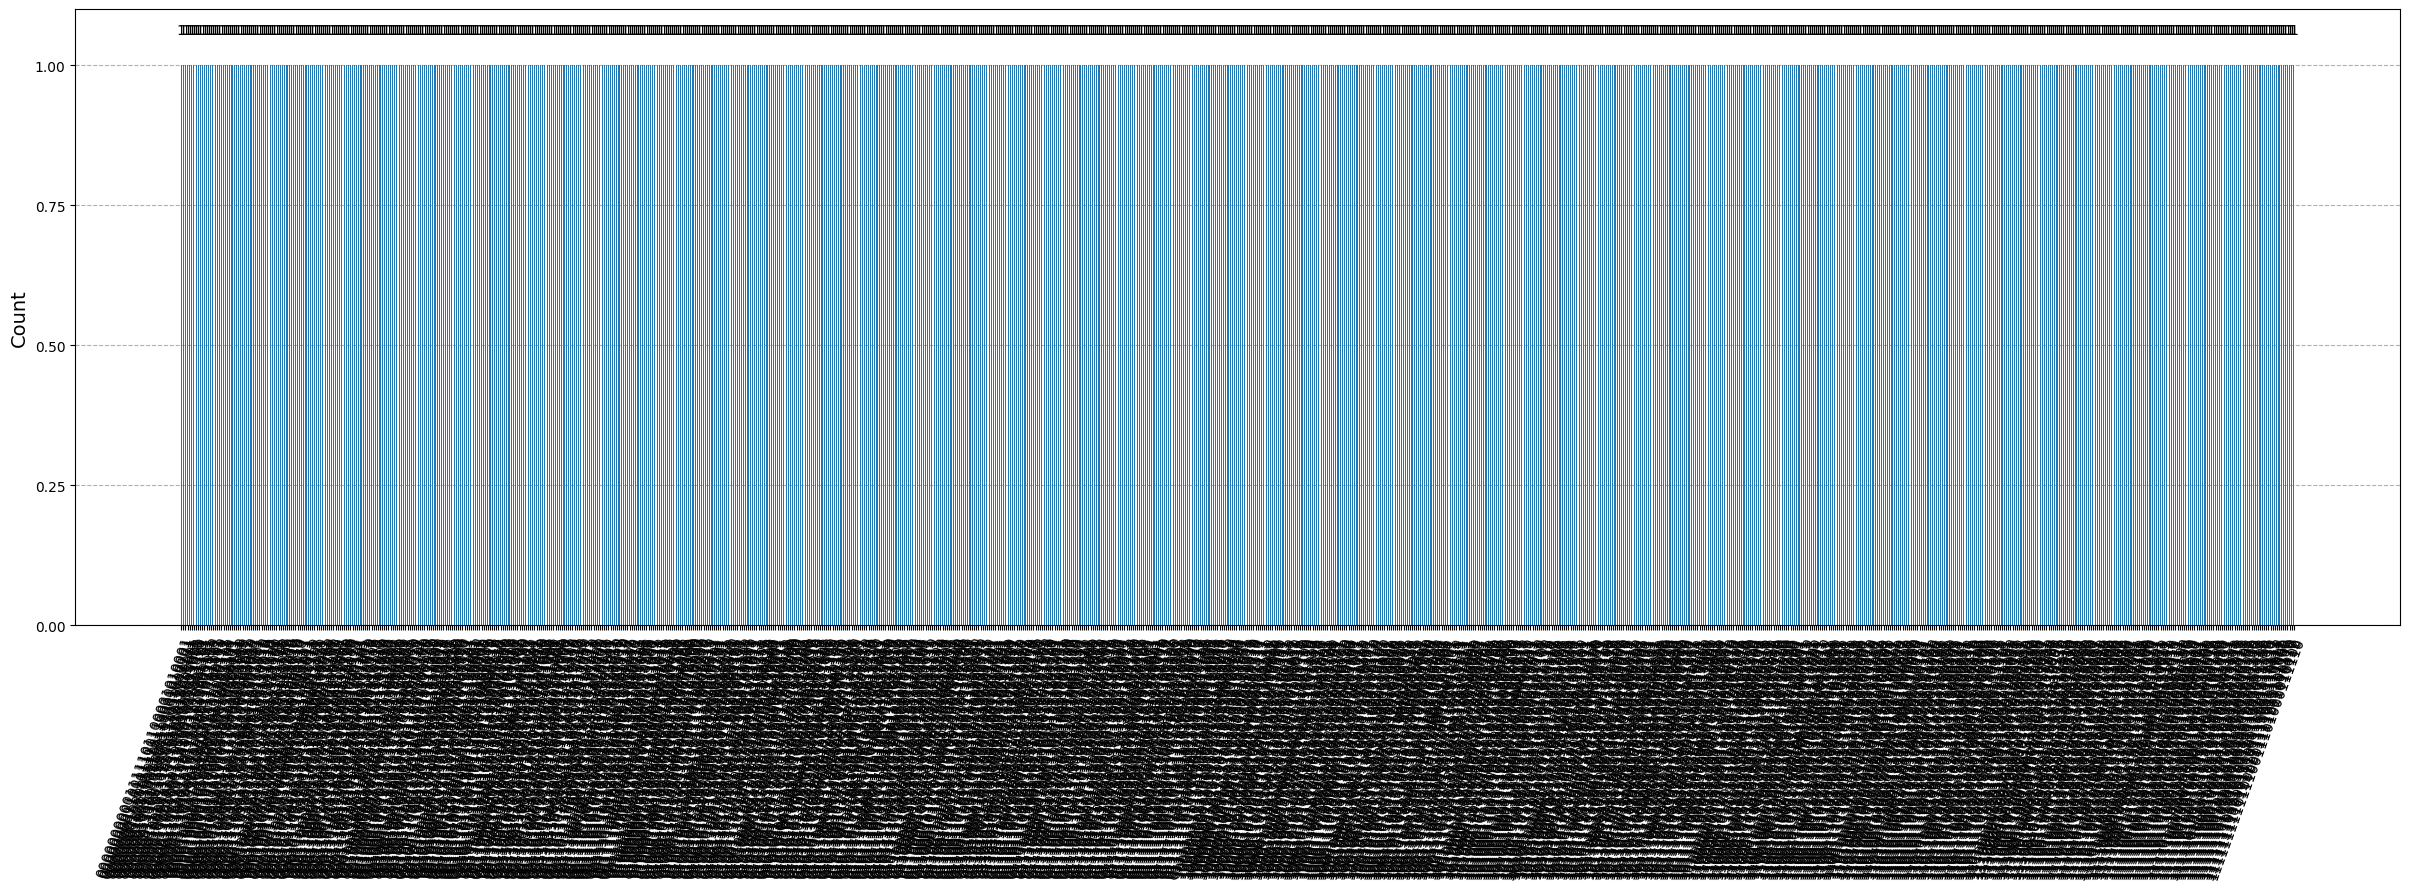

In [34]:
# run quantum circuit 1000 times & get results
sampler = Sampler()
result = sampler.run([qc_isa], shots=1000).result()

counts = result[0].data.meas.get_counts()

# print qubits and their values
for qubits, val in counts.items():
    print(f'{int(qubits, 2)}: {val}')

# plot histogram of results
plot_histogram(counts, figsize=(30,8))